<a href="https://colab.research.google.com/github/mohmiim/MLIntroduction/blob/master/session-3/ImageConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')
IMAGE_PATH = ("/content/gdrive/My Drive/charts/train/bar_chart/10.png")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


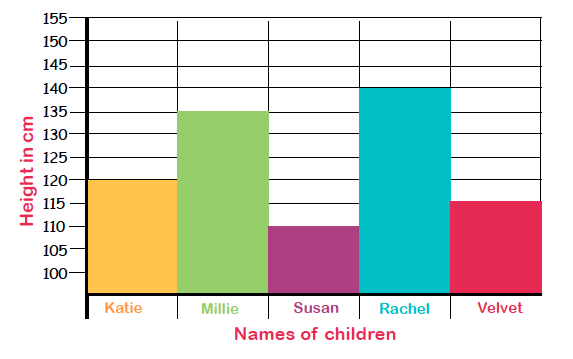

In [28]:
# load and show the image 
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
from IPython.display import display # to display images

# load the image
image = Image.open(IMAGE_PATH)
# convert the image to grayscale
gs_image = image.convert(mode='L')
display(image)

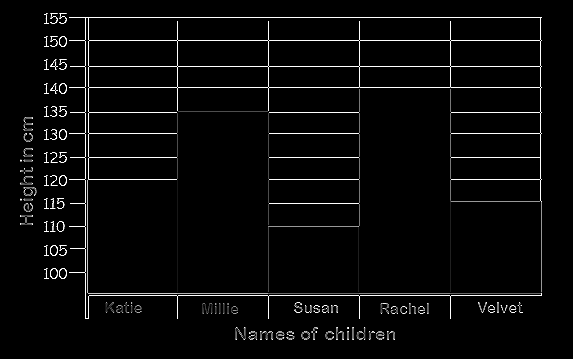

In [50]:
from PIL import ImageDraw

I = gs_image.load()

# Sobel kernels
K = [[0, 1, 0],
     [1, -4, 1],
     [0, 1, 0]]


# Create output image
output_image = Image.new("L", gs_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(1, gs_image.width - 1):
    for y in range(1, gs_image.height - 1):
        newColor = 0
        for a in range(3):
            for b in range(3):
                xn = x + a - 1
                yn = y + b - 1
                newColor += I[xn,yn] * K[a][b]
        draw.point((x, y), newColor)

display(output_image)